<a href="https://colab.research.google.com/github/chetna-b/practice_projects/blob/main/notebooks/UCI_credit_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option("display.max_column", 100)
import requests
from zipfile import ZipFile
from io import BytesIO

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Download Data**

In [ ]:
url = "https://archive.ics.uci.edu/static/public/350/default+of+credit+card+clients.zip"

response = requests.get(url)

if response.status_code == 200:
    zip_contents = BytesIO(response.content)

    with ZipFile(zip_contents, "r") as zip_file:
        csv_filename = zip_file.namelist()[0]
        print(csv_filename)

        with zip_file.open(csv_filename) as csv_file:
            try:
              df = pd.read_csv(csv_file)
            except:
              df = pd.read_excel(csv_file)

    print(df.head())
else:
    print("Error: Failed to download the ZIP file.")


default of credit card clients.xls
  Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9    X10    X11        X12        X13        X14        X15        X16  \
0  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5   
1     -1     -2     -2       3913       3102        689          0          0   
2      0      0      2       2682       1725       2682       3272       3455   
3      0      0      0      29239      14027      13559      14331      14948   
4      0      0      0      46990      48233      49291      28314      28959   

   

In [ ]:
# Replacing column names with the values in the first row
df.columns = df.iloc[0,].tolist()

# Dropping the first row
df = df[1:].reset_index(drop=True)

# **Exploratory Data**

### **Basic Info**

In [ ]:
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1


**Key Takeaways:**  
1. `PAY_0` column name looks incorrect, given that BILL_AMT and PAY_AMT start with 1; renaming it to `PAY_1`.
2. Renaming the Y label column to `default` for convenience.

In [ ]:
df = df.rename(columns={'PAY_0': 'PAY_1', 'default payment next month': 'default'})

In [ ]:
# Checking count, nulls and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  object
 1   LIMIT_BAL  30000 non-null  object
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  object
 6   PAY_1      30000 non-null  object
 7   PAY_2      30000 non-null  object
 8   PAY_3      30000 non-null  object
 9   PAY_4      30000 non-null  object
 10  PAY_5      30000 non-null  object
 11  PAY_6      30000 non-null  object
 12  BILL_AMT1  30000 non-null  object
 13  BILL_AMT2  30000 non-null  object
 14  BILL_AMT3  30000 non-null  object
 15  BILL_AMT4  30000 non-null  object
 16  BILL_AMT5  30000 non-null  object
 17  BILL_AMT6  30000 non-null  object
 18  PAY_AMT1   30000 non-null  object
 19  PAY_AMT2   30000 non-null  object
 20  PAY_AMT3   30000 non-null  o

**Key Takeaways**:  
1. Shape of the data is (30000, 25) with no missing values in any of the columns.  
2. The `ID` column can be excluded from EDA/modelling. That leaves us with 23 feature columns and 1 label column (`default`).
3. All columns need to be converted to numerical dtype. Further transformation of categorical variables will be explored later.

In [ ]:
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
label = 'default'

In [ ]:
df = df[features+[label]]

In [ ]:
df.nunique()

LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
default          2
dtype: int64

### **dtype conversions**

In [ ]:
for feat in [x for x in features if 'AMT' in x or x == 'LIMIT_BAL']:
  df[feat] = df[feat].astype(float)

for feat in ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']:
  df[feat] = df[feat].astype(int)

for feat in ['PAY_' + str(i) for i in range(1,7)]:
  df[feat] = df[feat].astype(int)

df[label] = df[label].astype(int)

<ipython-input-10-002b6443abec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat] = df[feat].astype(float)


In [ ]:
df.sample()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
8527,110000.0,1,1,2,26,0,0,0,0,0,0,109386.0,99100.0,50827.0,51834.0,52921.0,54013.0,2432.0,3686.0,1850.0,1917.0,1968.0,1950.0,0


### **Check class imbalance**

In [ ]:
df[label].value_counts()/df.shape[0]

0    0.7788
1    0.2212
Name: default, dtype: float64

Their is an **imbalance** with positive class forming the **minority**. To be handled later in modeling stage.


### **Numerical summary**

In [ ]:
df[features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0




1.   **Unexpected values observed in following columns:**
     1. `EDUCATION` (expected min, max: 1, 4; actual: 0, 6)
     2. `MARRIAGE` (expected min, max: 1, 3; actual: 0, 3)
     3. `PAY_1` to `PAY_6` (expected min: -1; actual: -2)  

2.  Presence of extremely high values in some columns like BILL_AMT3 and PAY_AMT2. Might be outliers.




In [ ]:
def plot_bars(ax, data, x, hue=None):
  if hue:
    plot_data = data[[x, hue]].value_counts().reset_index()
    y = plot_data.columns.tolist()[-1]
    sns.barplot(ax=ax, data=plot_data, x=x, y=y, hue=hue)
  else:
    plot_data = data[x].value_counts().reset_index()
    sns.barplot(ax=ax, data=plot_data, x=x, y=y)

### **Bar Plots of Categorical columns**

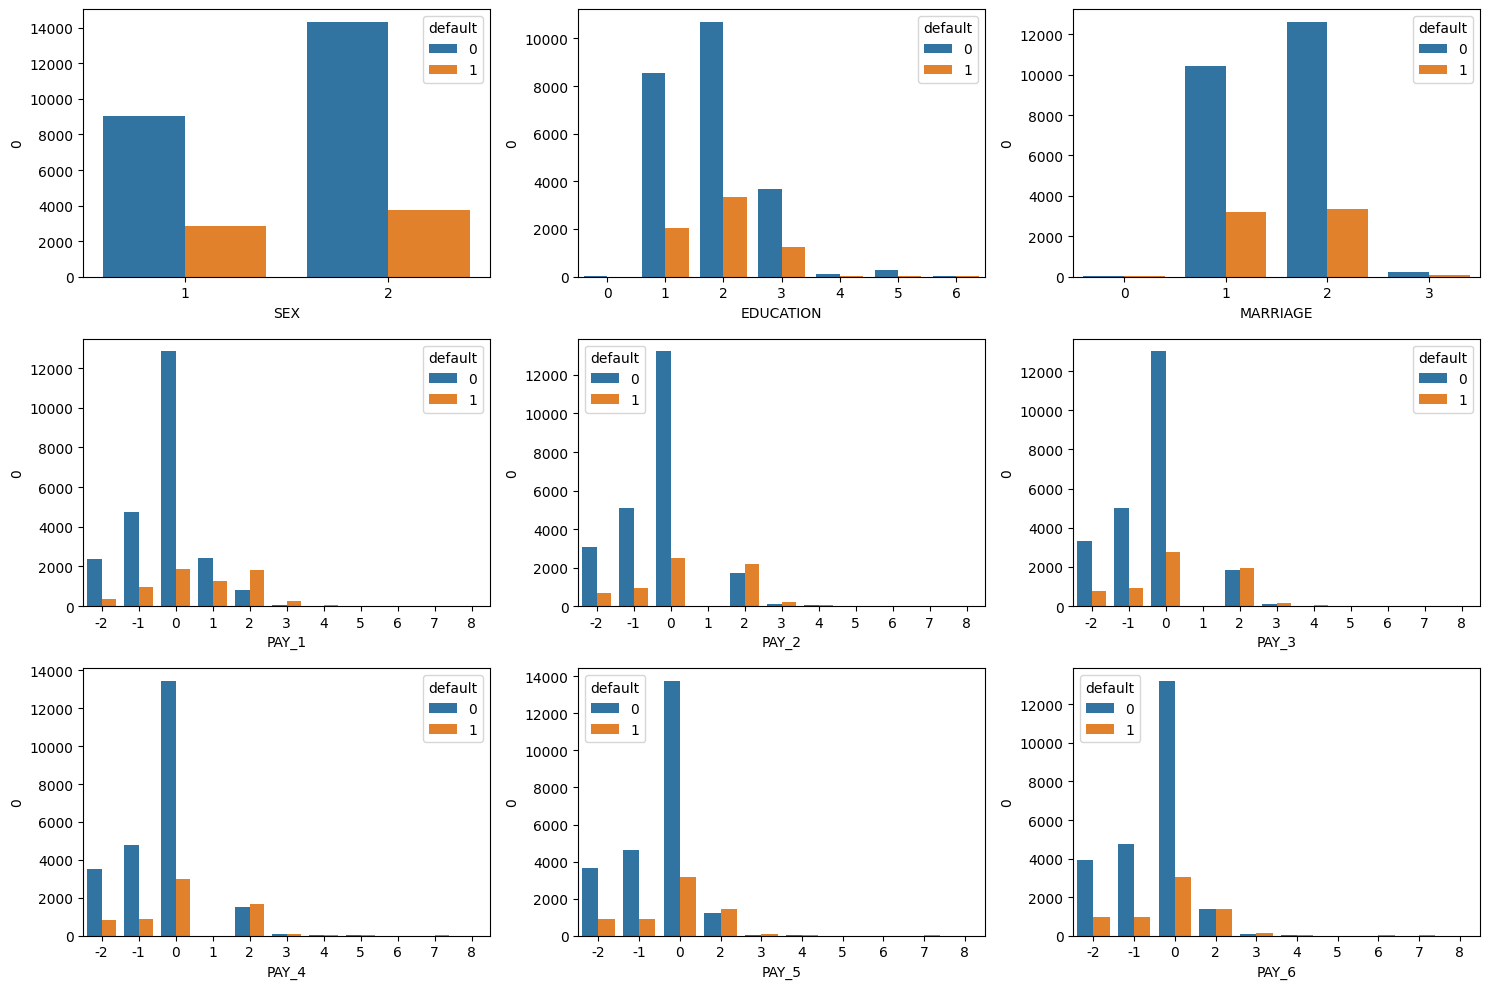

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

axes = axes.flatten()

feat_list = ['SEX', 'EDUCATION', 'MARRIAGE'] + ['PAY_' + str(i) for i in range(1, 7)]

for i, ax in enumerate(axes):
  plot_bars(ax, df, feat_list[i], label)

plt.tight_layout()

plt.show()

**Key takeaways:**.

1. There are more female clients than male and the proportion of default case is higher for the latter.  
  
2. Unexpected values (0, 5 and 6) are observed in the `EDUCATION` column. Since we don't know what they mean, we'll club them with 4 (Others) for the scope of this notebook.  
  
3. Unexpected value (0) is observed in the `MARRIAGE` column. We can club it with 3 using the same rationale as used in the previous point. Interestingly, married clients have a higher proportion of default cases.    
  
4. Unexpected values (-2, 0) observed in PAY_i columns. Let's examine a few crosstabs w.r.t label column as well as some raw samples to understand them better. Also, we see that the value 1 is extremely rare in PAY_2, 3 and 4 and completely absent in PAY_5 and 6 columns. Additionally, values >=3 are rare in all PAY_i columns so maybe we can try clubbing them.

### Deep dive into PAY_n columns

In [ ]:
for col in ['PAY_' + str(i) for i in range(1, 7)]:
  print(pd.crosstab(df[col], df[label], normalize='index')*100)
  print('-------------------------------')

default          0          1
PAY_1                        
-2       86.770569  13.229431
-1       83.221949  16.778051
 0       87.188709  12.811291
 1       66.052061  33.947939
 2       30.858643  69.141357
 3       24.223602  75.776398
 4       31.578947  68.421053
 5       50.000000  50.000000
 6       45.454545  54.545455
 7       22.222222  77.777778
 8       42.105263  57.894737
-------------------------------
default           0          1
PAY_2                         
-2        81.729244  18.270756
-1        84.033058  15.966942
 0        84.087730  15.912270
 1        82.142857  17.857143
 2        44.385027  55.614973
 3        38.343558  61.656442
 4        49.494949  50.505051
 5        40.000000  60.000000
 6        25.000000  75.000000
 7        40.000000  60.000000
 8       100.000000   0.000000
-------------------------------
default          0          1
PAY_3                        
-2       81.468788  18.531212
-1       84.405524  15.594476
 0       82.548845  17.

**Key takeaways:**  
1. The above crosstabs show label's distribution across discrete values of the PAY_n columns.  

2. We see that cases with values > 0 indicate stronger association with the positive class (default=1) for all columns **except** PAY_1.  

3. While the crosstab shows that 0 valued cases behave similar to negative ones (stronger association towards default=0), it could just be an effect of the dominance of the majority class.

In [ ]:
df[['PAY_1', 'BILL_AMT2', 'PAY_AMT1', 'BILL_AMT1', 'default']].sample(10)

,PAY_1,BILL_AMT2,PAY_AMT1,BILL_AMT1,default
2597,0,14747.0,1240.0,14520.0,0
29129,0,20639.0,1340.0,19629.0,0
4918,0,122955.0,30054.0,107801.0,0
12954,-1,290.0,390.0,560.0,0
2431,1,58104.0,4000.0,60024.0,0
19435,0,70087.0,2600.0,70805.0,0
5134,2,28675.0,1788.0,28033.0,0
25936,1,0.0,0.0,0.0,0
1976,0,32876.0,5000.0,28566.0,0
28503,2,109909.0,12924.0,100247.0,1


In [ ]:
df[['PAY_1', 'BILL_AMT2', 'PAY_AMT1', 'BILL_AMT1', 'default']].sample(10)

,PAY_1,BILL_AMT2,PAY_AMT1,BILL_AMT1,default
9721,0,68284.0,3517.0,67864.0,1
26351,0,9720.0,1500.0,12045.0,0
17459,-1,1589.0,1589.0,3092.0,0
18542,0,64787.0,3000.0,66731.0,0
10868,0,57786.0,3500.0,59331.0,0
15032,0,12309.0,4600.0,8168.0,1
4407,0,50716.0,2128.0,50902.0,0
8095,-1,1245.0,4045.0,26349.0,0
14362,0,2645.0,1300.0,6195.0,1
7325,0,52468.0,2473.0,50822.0,0


### PAY_n columns transformation logic

We observe ambiguous behaviour in PAY_1 column, w.r.t the attribute explanation given. For example, row no. 15998 shows that the client did **not** make a payment (PAY_AMT1=0) despite a non 0 outstanding and still the PAY_1 value is -1.  
It's possible that more information is needed to correctly interpret the columns which is not available right now.

For simplicity's sake, we'll use the following cleaning approach for PAY_i columns:  
1. PAY_1:  
   if value in (0, 1) then cleaned_value = value  
   elif value <= -1 then cleaned_value = -1  
   else cleaned_value = 2   
2. PAY_2 to PAY_6:  
   if value < 0 then cleaned_value = -1  
   elif value > 0 then cleaned_value = 1  
   else cleaned_value = 0  

### Exploring the `AGE` column

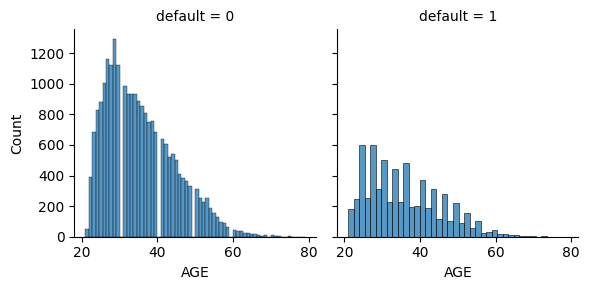

In [ ]:
grid = sns.FacetGrid(df, col="default")
grid.map(sns.histplot, "AGE")

plt.show()

<Axes: xlabel='default', ylabel='AGE'>

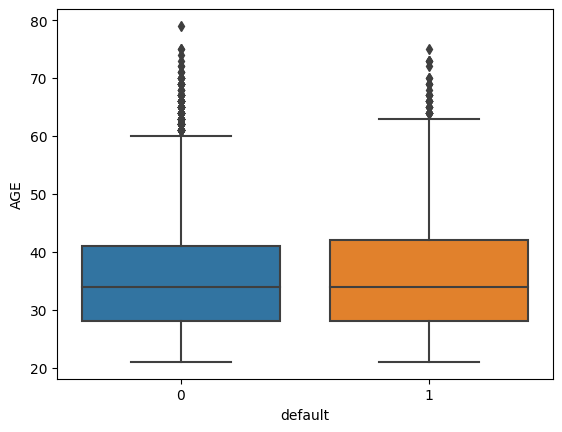

In [ ]:
sns.boxplot(data=df, x='default', y='AGE')

There's not much difference between the distribution of AGE across both classes except that the Q3 lies slightly higher for default=1.  
Maybe combining AGE with other features will give more informational crosses.

<Axes: xlabel='SEX', ylabel='AGE'>

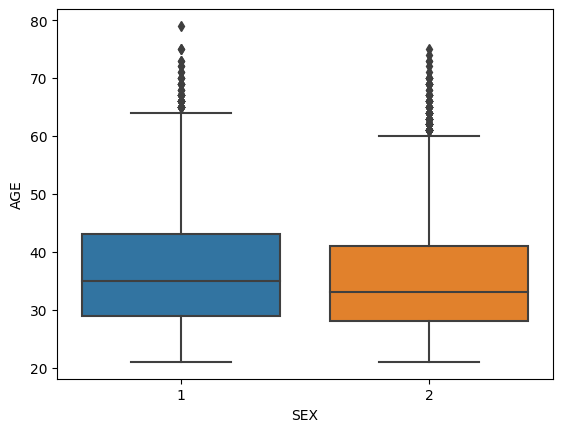

In [ ]:
sns.boxplot(x='SEX', y='AGE', data=df)

The female client base is relatively younger than male.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


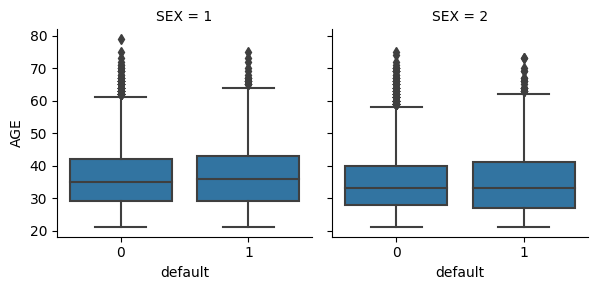

In [ ]:
grid = sns.FacetGrid(df, col='SEX')

grid.map(sns.boxplot, "default", "AGE")
grid.add_legend()

Cross between SEX and AGE doesn't seem to be that much of a differentiator in determining default's value.  
Skipping other cross explorations in interest of time.

### **Exploring pairplots and correlations**

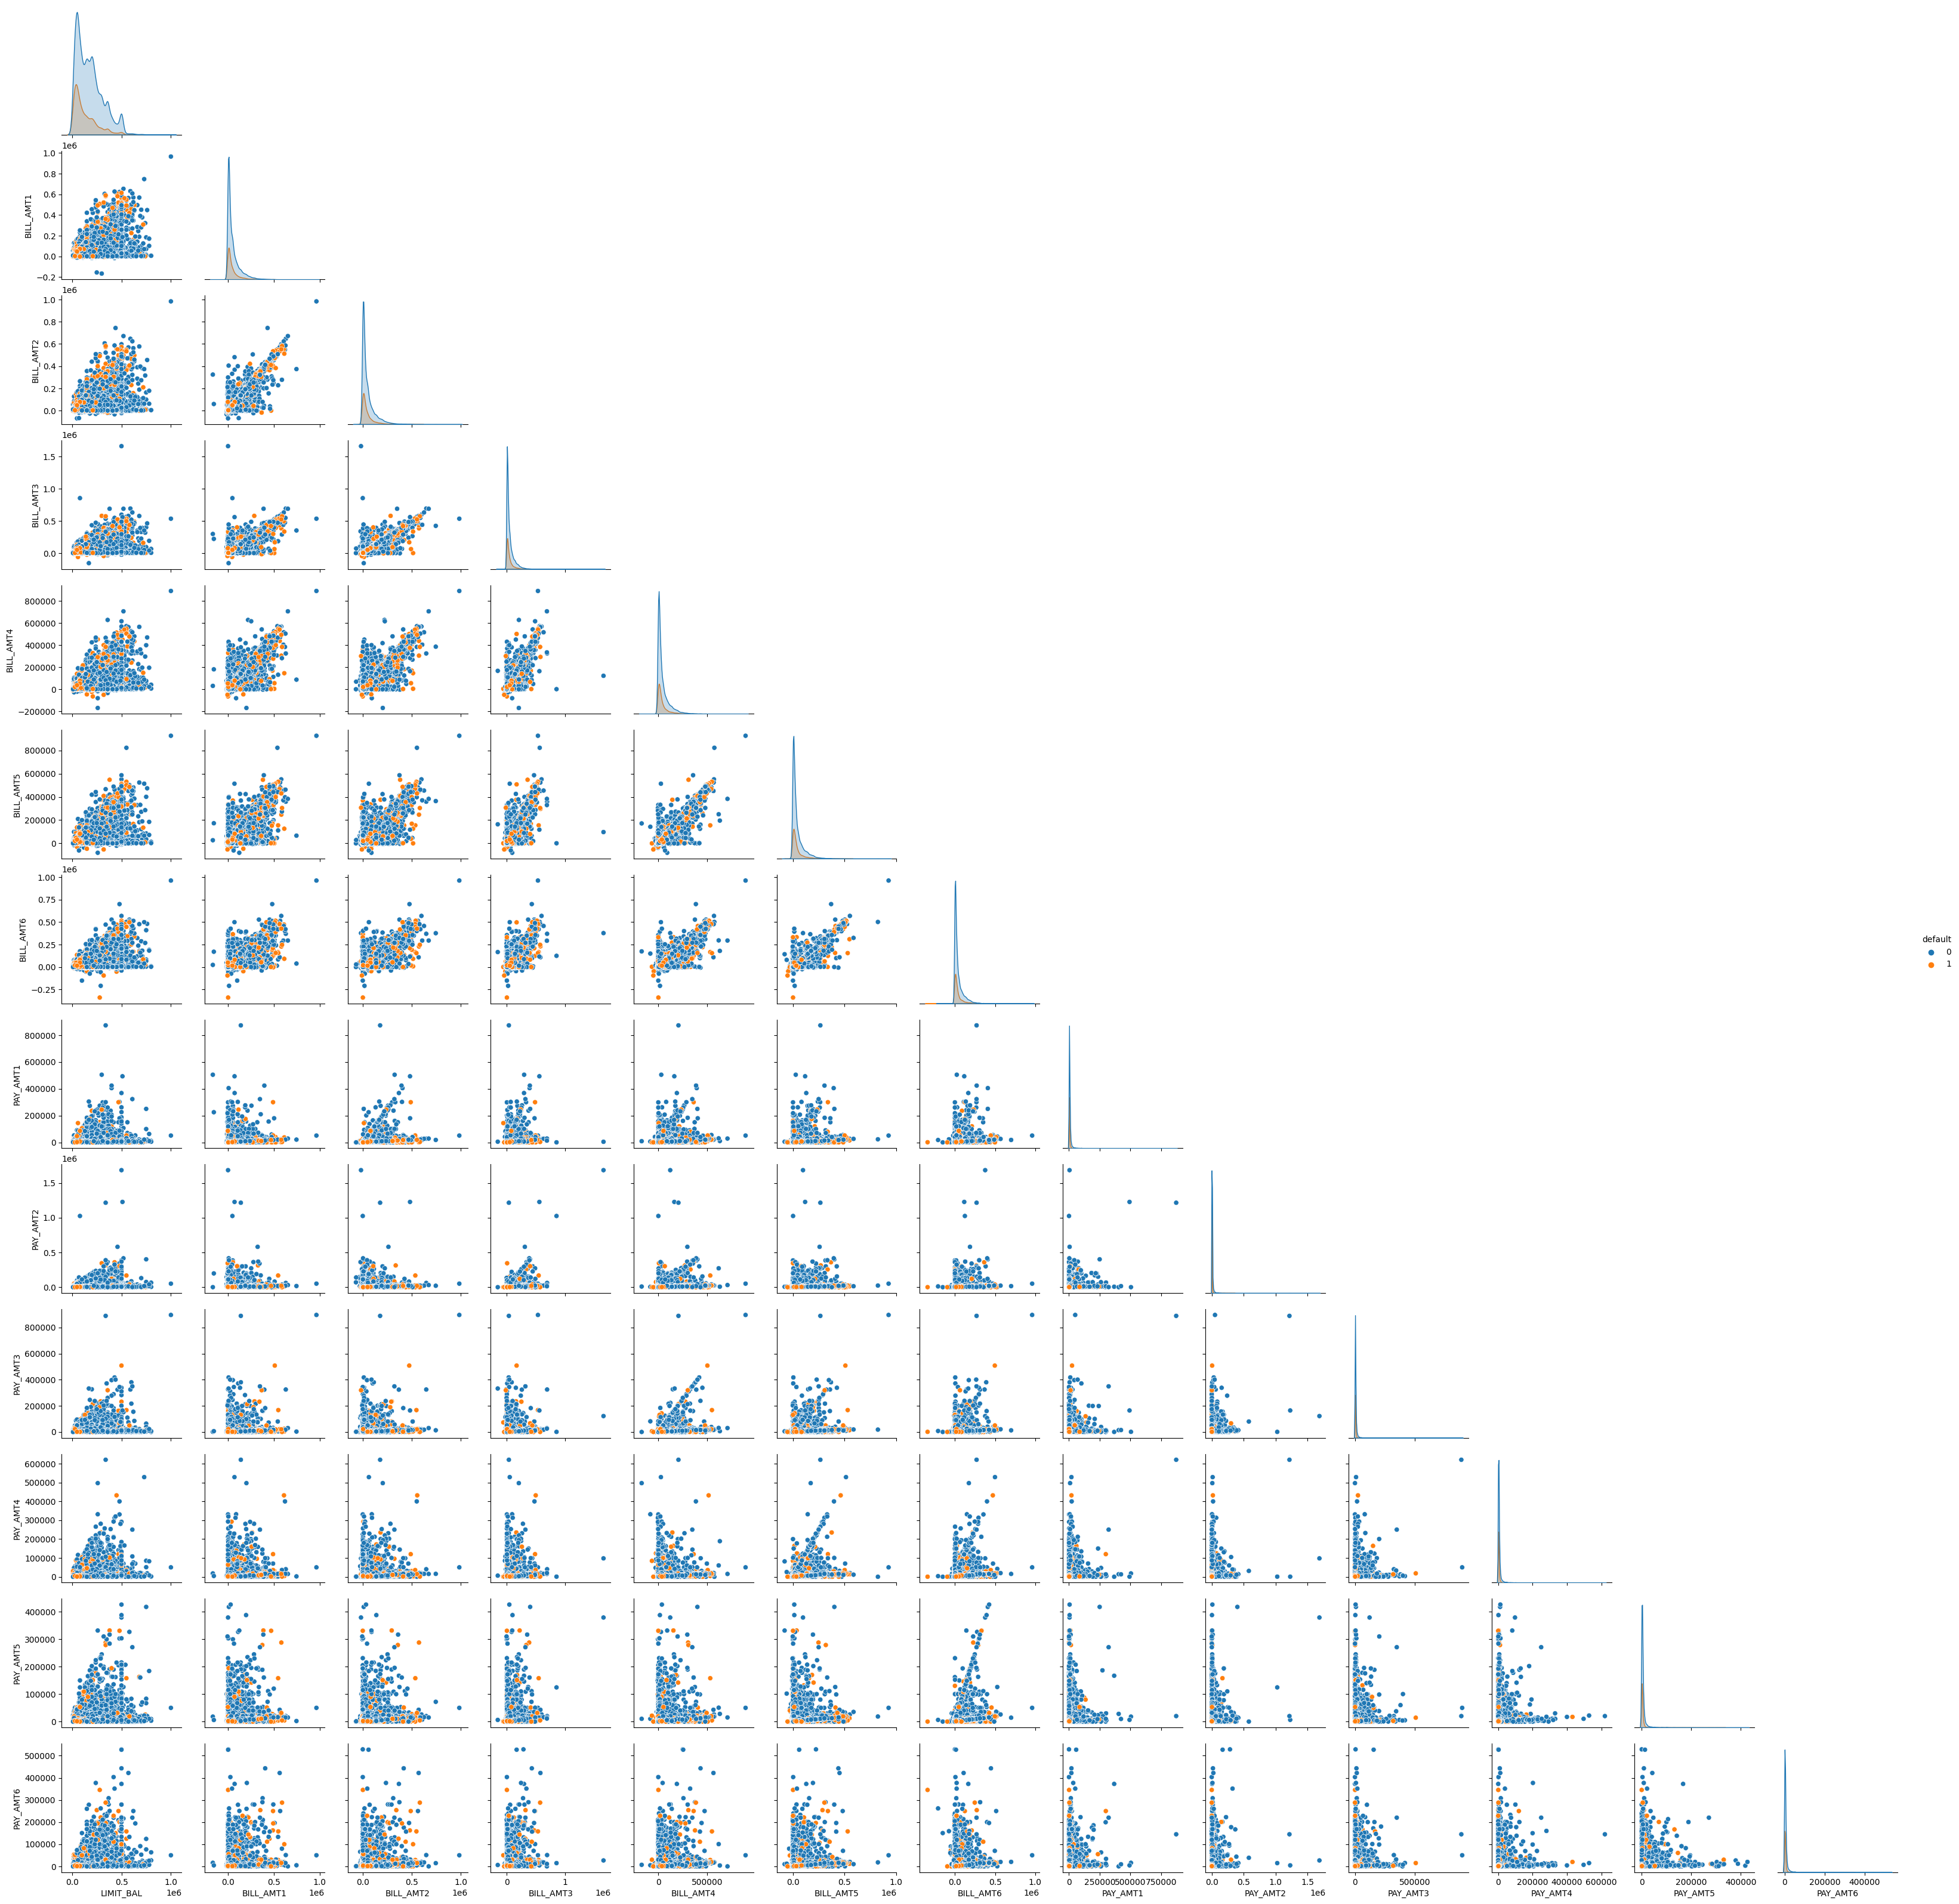

In [ ]:
pairplot_features = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
sns.pairplot(df[pairplot_features+[label]], kind='scatter', diag_kind='kde', hue=label, corner=True)

# Display the plot
plt.show()


   
   .

**Key takeaways:**.
1. Some of the BILL_AMT(n) and PAY_AMT(n-1) (e.g. BILL_AMT2, PAY_AMT1) as well as BILL_AMT(n) and BILL_AMT(n+1) (e.g. BILL_AMT1 and BILL_AMT2) variables show linear relationship.  

Let's quantify using correlation matrix

### **Removing outliers before conducting correlation analysis**

**1. Isolation Forests**

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
clf = IsolationForest(contamination=0.01)
is_outliers = clf.fit_predict(df[features])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
is_outliers==-1

array([False, False, False, ..., False, False, False])

In [ ]:
if_outliers_ix = df.loc[is_outliers == -1, :].index.values

In [ ]:
if_outliers_ix.shape

(300,)

**2. IQR Method**

In [ ]:
import numpy as np
iqr_outlier_features = [x for x in features if 'AMT' in x or x == 'LIMIT_BAL']

def flag_iqr_outliers(x, c=1.5):
    a = np.array(x)
    q3 = np.percentile(a, 75)
    q1 = np.percentile(a, 25)
    iqr = (q3 - q1) * c
    permit_range = (q1 - iqr, q3 + iqr)
    result = []
    for y in a.tolist():
      if y >= permit_range[0] and y <= permit_range[1]:
          result.append(1)
      else:
          result.append(-1)
    return np.array(result)

In [ ]:
iqr_outliers = flag_iqr_outliers(df[iqr_outlier_features[0]])

for feat in iqr_outlier_features[1:]:
  tmp = flag_iqr_outliers(df[feat])
  mask = np.array((iqr_outliers == -1)&(tmp == -1))
  iqr_outliers[mask == True] = -1
  iqr_outliers[mask == False] = 1

In [ ]:
iqr_outliers_ix = df.loc[iqr_outliers == -1, :].index.values

In [ ]:
iqr_outliers_ix.shape

(19,)

In [ ]:
combined_outliers_ix = np.union1d(if_outliers_ix, iqr_outliers_ix)

In [ ]:
combined_outliers_ix.shape

(306,)

### **Dropping outliers and performing correlation analysis**

In [ ]:
corr_df = df.drop(combined_outliers_ix, axis=0).copy()

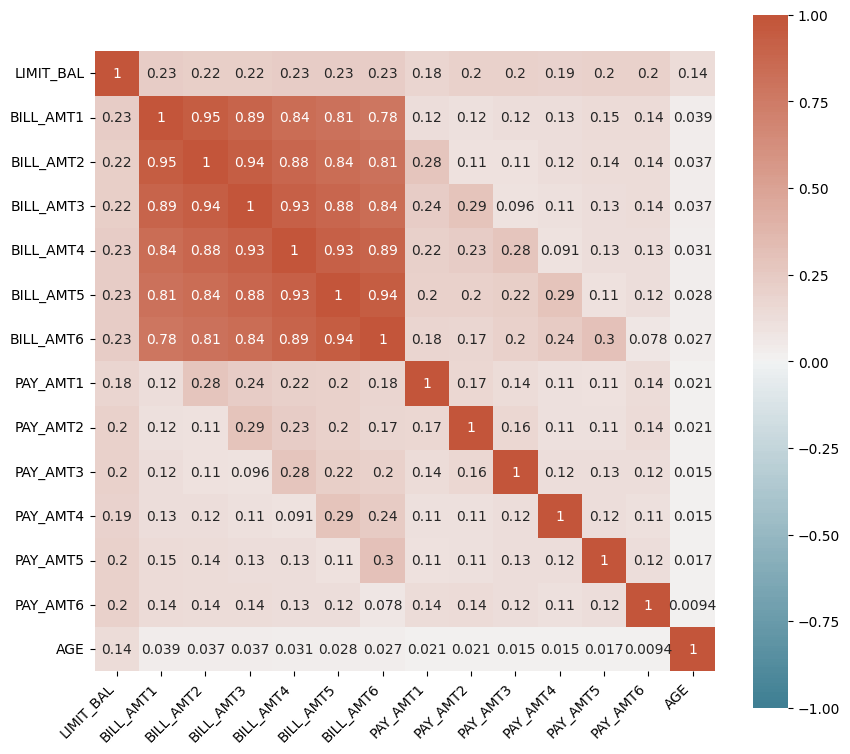

In [ ]:
corr = corr_df[pairplot_features+['AGE']].corr()
fig, ax = plt.subplots(figsize=(10,9))
sns.heatmap(
    corr,
    vmin = -1,
    vmax = 1,
    center = 0,
    cmap=sns.diverging_palette(220, 20, n=200),
    square = True,
    ax = ax,
    annot = True

)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

**Key Takeaways:**  
1. The BILL_AMTn features are highly correlated. We can experiment by creating a combination feature out of them.  


Let's create two new features:  
1. AVG_BILL_AMT : mean of all BILL_AMT columns  
2. CLOSENESS_1: Difference between latest bill amount and credit limit, normalized by credit limit. Intuitively, a smaller value here should indicate a higher chance of default

In [ ]:
df['AVG_BILL_AMT'] = df[[x for x in features if 'BILL' in x]].mean(axis=1)

In [ ]:
df['CLOSENESS_1'] = (df['LIMIT_BAL'] - df['BILL_AMT1']) / df['LIMIT_BAL']

In [ ]:
df.sample()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,AVG_BILL_AMT,CLOSENESS_1
9663,230000.0,2,2,1,30,-1,-1,-1,0,-1,-1,3686.0,5557.0,5816.0,1288.0,23196.0,15072.0,5619.0,5838.0,7.0,23312.0,15147.0,16518.0,0,9102.5,0.983974


# **Data Transformation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
print(f"Original feature columns: {features}\n----------------------")
print(f"Label column: {label}")


Original feature columns: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
----------------------
Label column: default


In [ ]:
y = df[label]
X = df[features]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
def get_transformed_pay_n(val, is_pay_1=False):
  if is_pay_1:
    if val in (0,1):
      return val
    elif val <= -1:
      return -1
    else:
      return 2
  else:
    if val < 0:
      return -1
    elif val > 0:
      return 1
    else:
      return 0

In [ ]:
def get_transformed_data(X):
  # club extra categories of EDUCATION column
  X['EDUCATION_tr'] = X['EDUCATION'].apply(lambda x: 4 if x in (0,5,6) else x)

  # club extra categories of MARRIAGE column
  X['MARRIAGE_tr'] = X['MARRIAGE'].apply(lambda x: 3 if x == 0 else x)

  # transform the PAY_n columns as described in EDA
  X['PAY_1_tr'] = X['PAY_1'].apply(lambda x: get_transformed_pay_n(x, True))

  for col in ['PAY_' + str(i) for i in range(2, 7)]:
    X[col + '_tr'] = X[col].apply(lambda x: get_transformed_pay_n(x, False))

  # create new columns for avg bill amount and closeness_1 as descrobed in EDA
  X['AVG_BILL_AMT'] = X[[x for x in features if 'BILL' in x]].mean(axis=1)

  X['CLOSENESS_1'] = (X['LIMIT_BAL'] - X['BILL_AMT1']) / X['LIMIT_BAL']

  return X

In [ ]:
X_train_tr = get_transformed_data(X_train)

In [ ]:
X_train_tr.sample(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_tr,MARRIAGE_tr,PAY_1_tr,PAY_2_tr,PAY_3_tr,PAY_4_tr,PAY_5_tr,PAY_6_tr,AVG_BILL_AMT,CLOSENESS_1
18867,180000.0,2,2,2,28,8,7,6,5,4,3,197231.0,194309.0,189981.0,185559.0,181137.0,184009.0,0.0,0.0,0.0,0.0,6000.0,0.0,2,2,2,1,1,1,1,1,188704.333333,-0.095728
10035,190000.0,1,1,2,26,0,0,0,0,0,0,184136.0,186387.0,172506.0,89806.0,91744.0,93903.0,9000.0,6500.0,3500.0,3500.0,3800.0,3600.0,1,2,0,0,0,0,0,0,136413.666667,0.030863
27489,140000.0,1,3,1,53,0,0,0,0,0,0,133167.0,135889.0,81607.0,83927.0,84861.0,86556.0,5400.0,3000.0,4000.0,3500.0,3504.0,3500.0,3,1,0,0,0,0,0,0,101001.166667,0.048807
1683,200000.0,1,1,1,44,-1,-1,-2,-2,-2,-2,667.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,-1,-1,-1,-1,-1,-1,111.166667,0.996665
6675,240000.0,2,2,1,32,1,-2,-1,-1,-1,-1,0.0,0.0,493.0,-5.0,574.0,3509.0,0.0,493.0,0.0,579.0,3509.0,1198.0,2,1,1,-1,-1,-1,-1,-1,761.833333,1.000000


In [ ]:
X_train_tr.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'EDUCATION_tr', 'MARRIAGE_tr', 'PAY_1_tr', 'PAY_2_tr', 'PAY_3_tr',
       'PAY_4_tr', 'PAY_5_tr', 'PAY_6_tr', 'AVG_BILL_AMT', 'CLOSENESS_1'],
      dtype='object')

In [ ]:
num_features = ['LIMIT_BAL', 'AGE', 'PAY_AMT1',
                'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                'AVG_BILL_AMT', 'CLOSENESS_1']

cat_features = ['SEX', 'EDUCATION_tr', 'MARRIAGE_tr', 'PAY_1_tr', 'PAY_2_tr',
                'PAY_3_tr', 'PAY_4_tr', 'PAY_5_tr', 'PAY_6_tr']

In [ ]:
full_pipeline = ColumnTransformer([
    ("num", "passthrough", num_features),
    ("cat", OneHotEncoder(), cat_features)
])

In [ ]:
X_train_prepared = full_pipeline.fit_transform(X_train_tr[num_features+cat_features])

In [ ]:
X_train_prepared.shape

(24000, 38)

### **Remove outliers on train data**

In [ ]:
X_train_df = pd.DataFrame(X_train_prepared, columns = full_pipeline.get_feature_names_out())
y_train_df = y_train.reset_index(drop=True)

train_df = X_train_df.join(y_train_df)

In [ ]:
train_df

,num__LIMIT_BAL,num__AGE,num__PAY_AMT1,num__PAY_AMT2,num__PAY_AMT3,num__PAY_AMT4,num__PAY_AMT5,num__PAY_AMT6,num__AVG_BILL_AMT,num__CLOSENESS_1,cat__SEX_1,cat__SEX_2,cat__EDUCATION_tr_1,cat__EDUCATION_tr_2,cat__EDUCATION_tr_3,cat__EDUCATION_tr_4,cat__MARRIAGE_tr_1,cat__MARRIAGE_tr_2,cat__MARRIAGE_tr_3,cat__PAY_1_tr_-1,cat__PAY_1_tr_0,cat__PAY_1_tr_1,cat__PAY_1_tr_2,cat__PAY_2_tr_-1,cat__PAY_2_tr_0,cat__PAY_2_tr_1,cat__PAY_3_tr_-1,cat__PAY_3_tr_0,cat__PAY_3_tr_1,cat__PAY_4_tr_-1,cat__PAY_4_tr_0,cat__PAY_4_tr_1,cat__PAY_5_tr_-1,cat__PAY_5_tr_0,cat__PAY_5_tr_1,cat__PAY_6_tr_-1,cat__PAY_6_tr_0,cat__PAY_6_tr_1,default
0,80000.0,24.0,3503.0,5001.0,2092.0,1218.0,1445.0,878.0,63938.333333,0.060937,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,30000.0,28.0,5006.0,1244.0,851.0,955.0,0.0,0.0,22526.666667,0.025267,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
2,180000.0,44.0,0.0,850.0,0.0,6881.0,10340.0,182.0,6497.833333,0.883800,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
3,60000.0,25.0,2018.0,1900.0,2000.0,1500.0,1900.0,2000.0,44834.166667,0.019350,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,130000.0,25.0,4100.0,4200.0,5000.0,5000.0,5000.0,10700.0,116875.000000,0.141638,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,50000.0,32.0,2000.0,3000.0,1591.0,72.0,1134.0,73421.0,42188.000000,-0.049500,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
23996,200000.0,37.0,13500.0,6000.0,0.0,7500.0,6000.0,4000.0,166233.666667,0.214345,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
23997,50000.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
23998,70000.0,25.0,3000.0,2000.0,4500.0,1200.0,0.0,1200.0,47895.500000,-0.056271,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


In [ ]:
train_df_features = [x for x in train_df.columns if x != 'default']

In [ ]:
clf = IsolationForest(contamination=0.01)
is_outliers = clf.fit_predict(train_df[train_df_features[:len(num_features)]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
if_outliers_ix = train_df.loc[is_outliers == -1, :].index.values

In [ ]:
iqr_outlier_features = [x for x in train_df_features[:len(num_features)] if x not in ('num__AGE', 'num__AVG_BILL_AMT', 'num__CLOSENESS_1')]
iqr_outliers = flag_iqr_outliers(train_df[iqr_outlier_features[0]])

for feat in iqr_outlier_features[1:]:
  tmp = flag_iqr_outliers(train_df[feat])
  mask = np.array((iqr_outliers == -1)&(tmp == -1))
  iqr_outliers[mask == True] = -1
  iqr_outliers[mask == False] = 1

In [ ]:
iqr_outlier_features

['num__LIMIT_BAL',
 'num__PAY_AMT1',
 'num__PAY_AMT2',
 'num__PAY_AMT3',
 'num__PAY_AMT4',
 'num__PAY_AMT5',
 'num__PAY_AMT6']

In [ ]:
iqr_outliers_ix = train_df.loc[iqr_outliers == -1, :].index.values

In [ ]:
iqr_outliers_ix.shape

(18,)

In [ ]:
combined_outliers_ix = np.union1d(if_outliers_ix, iqr_outliers_ix)

In [ ]:
combined_outliers_ix.shape

(250,)

In [ ]:
train_df_final = train_df.drop(combined_outliers_ix, axis=0).copy().reset_index(drop=True)

In [ ]:
train_df_final.shape

(23750, 39)

# **Model Training and Evaluation**

We'll be experimenting with Tree based classifiers within the scope of this notebook. These models do not rely on feature data being normalized or standardized which saves us a preprocessing step. Nor do they make any assumptions on linear dependencies which gives us added flexibility.  
The objective of following modelling trials is to give a gist of standard practices followed while conducting such exercises.

In [ ]:
X_train_final = train_df[train_df_features]
y_train_final = train_df['default']

### **Prepare val data by applying transformations done in previous step**

In [ ]:
y_val_final = y_val.reset_index(drop=True)

X_val_tr = get_transformed_data(X_val)
X_val_prepared = full_pipeline.transform(X_val_tr[num_features + cat_features])

# Outlier elimination step is intentionally omitted as it is only done on train data
val_df = pd.DataFrame(X_val_prepared, columns=train_df_features)\
                  .join(y_val_final)\
                  .reset_index(drop=True)

X_val_final = val_df[train_df_features]

### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer

In [ ]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_final, y_train_final)

RandomForestClassifier(random_state=42)

### **Evaluation function**

Using `f1_score` as the evaluation metric here so as to give equal importance to both Precision and Recall, since we don't have the business context to distinguish otherwise.  

In [ ]:

def get_rounded_f1(y_true, y_pred, rounding_factor=2):
  f1 = f1_score(y_true, y_pred, labels=[1], average='binary')
  rounded_f1 = "{:.2f}".format(round(f1, 2))
  return rounded_f1

In [ ]:
def get_preds_and_metrics(model, model_config, X_train, X_val, y_train, y_val, metrics_dict):
  y_train_pred = model.predict(X_train)
  train_perf = get_rounded_f1(y_train, y_train_pred)

  y_val_pred = model.predict(X_val)
  val_perf = get_rounded_f1(y_val, y_val_pred)

  metrics['model_config'].append(model_config)
  metrics['train_f1'].append(train_perf)
  metrics['val_f1'].append(val_perf)
  print(pd.DataFrame(metrics))
  return y_train_pred, y_val_pred, metrics

In [ ]:
metrics = {'model_config': [], 'train_f1': [], 'val_f1': []}
rf_train_pred, rf_val_pred, metrics = get_preds_and_metrics(
    rf_classifier, 'rf', X_train_final, X_val_final, y_train_final, y_val_final, metrics)

  model_config train_f1 val_f1
0           rf     1.00   0.47


**Fetch feature importance**

In [ ]:
rf_ft_imp = pd.DataFrame({'importance': rf_classifier.feature_importances_,
                          'feature': rf_classifier.feature_names_in_})

In [ ]:
rf_ft_imp.sort_values('importance', ascending=False).head(10)

,importance,feature
9,0.085753,num__CLOSENESS_1
8,0.083182,num__AVG_BILL_AMT
1,0.079075,num__AGE
22,0.069480,cat__PAY_1_tr_2
0,0.069478,num__LIMIT_BAL
2,0.062671,num__PAY_AMT1
3,0.061517,num__PAY_AMT2
4,0.060138,num__PAY_AMT3
7,0.058050,num__PAY_AMT6
5,0.057874,num__PAY_AMT4


In [ ]:
rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import GridSearchCV


Tried running GridSearchCV for hyperparam tuning but the execution time was too long so skipping this step

In [ ]:
# param_grid = {
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'ccp_alpha': [0.0, 0.01],
#     'class_weight': [None, 'balanced']
# }

# rf_classifier = RandomForestClassifier(random_state=42)

# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring=make_scorer(f1_score))

# grid_search.fit(X_train_final, y_train_final)

# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best parameters:", best_params)
# print("Best F1 score:", best_score)

### RF with manually picked values for regularization param, ccp_alpha and class_weight param

The previous iteration showed significant gap between train and val performance. Hence, using ccp_alpha which is the regularizer param for RF.  

Also, it was established in EDA that there's a class imbalance (4:1), hence, using class_weight='balanced' param.

In [ ]:
rf_2 = RandomForestClassifier(ccp_alpha=0.01, class_weight='balanced', random_state=42)

In [ ]:
rf_2.fit(X_train_final, y_train_final)

RandomForestClassifier(ccp_alpha=0.01, class_weight='balanced', random_state=42)

In [ ]:
rf_2_train_pred, rf_2_val_pred, metrics = get_preds_and_metrics(
    rf_2, 'rf_ccp0_01_weight_bal', X_train_final, X_val_final, y_train_final, y_val_final, metrics)

            model_config train_f1 val_f1
0                     rf     1.00   0.47
1  rf_ccp0_01_weight_bal     0.53   0.52


While val performance shows improvement, the drop in train performance is concerning. Let's try out SMOTE for handling class imbalance instead of class_weight param.

### RF with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train_final)

In [ ]:
from collections import Counter

In [ ]:
count = Counter(y_train_resampled)
count_of_1s = count[1]
count_of_0s = count[0]

print("Count of 1s:", count_of_1s)
print("Count of 0s:", count_of_0s)

count_prior = Counter(y_train_final)
count_prior_of_1s = count_prior[1]
count_prior_of_0s = count_prior[0]

print("Original Count of 1s:", count_prior_of_1s)
print("Original Count of 0s:", count_prior_of_0s)

Count of 1s: 18677
Count of 0s: 18677
Original Count of 1s: 5323
Original Count of 0s: 18677


In [ ]:
rf_3 = RandomForestClassifier(ccp_alpha=0.01, random_state=42)
rf_3.fit(X_train_resampled, y_train_resampled)

rf_3_train_pred, rf_3_val_pred, metrics = get_preds_and_metrics(
    rf_3, 'rf_ccp0_01_smote', X_train_resampled, X_val_final, y_train_resampled, y_val_final, metrics)

            model_config train_f1 val_f1
0                     rf     1.00   0.47
1  rf_ccp0_01_weight_bal     0.53   0.52
2       rf_ccp0_01_smote     0.79   0.52


The performance looks better compared to previous iteration.

### **XGBoost Classifier**

In [ ]:
import xgboost as xgb

In [ ]:
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_final, y_train_final)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
xgb_train_pred, xgb_val_pred, metrics = get_preds_and_metrics(
    xgb_classifier, 'xgb', X_train_final, X_val_final, y_train_final, y_val_final, metrics)

            model_config train_f1 val_f1
0                     rf     1.00   0.47
1  rf_ccp0_01_weight_bal     0.53   0.52
2       rf_ccp0_01_smote     0.79   0.52
3                    xgb     0.68   0.45


### XGB with SMOTE

In [ ]:
xgb_smote = xgb.XGBClassifier(random_state=42)
xgb_smote.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
xgb_smote_train_pred, xgb_smote_val_pred, metrics = get_preds_and_metrics(
    xgb_smote, 'xgb_smote', X_train_resampled, X_val_final, y_train_resampled, y_val_final, metrics)

            model_config train_f1 val_f1
0                     rf     1.00   0.47
1  rf_ccp0_01_weight_bal     0.53   0.52
2       rf_ccp0_01_smote     0.79   0.52
3                    xgb     0.68   0.45
4              xgb_smote     0.91   0.47


### **Constant predictor model for baseline comparison**

In [ ]:
y_train_pred_cp = np.array([1 for i in range(1, len(y_train_final)+1)])
y_val_pred_cp = np.array([1 for i in range(1, len(y_val_final)+1)])

In [ ]:
train_cp_perf = get_rounded_f1(y_train_final, y_train_pred_cp)
val_cp_perf = get_rounded_f1(y_val_final, y_val_pred_cp)

metrics['model_config'].append('constant_predictor_1')
metrics['train_f1'].append(train_cp_perf)
metrics['val_f1'].append(val_cp_perf)
print(pd.DataFrame(metrics))

            model_config train_f1 val_f1
0                     rf     1.00   0.47
1  rf_ccp0_01_weight_bal     0.53   0.52
2       rf_ccp0_01_smote     0.79   0.52
3                    xgb     0.68   0.45
4              xgb_smote     0.91   0.47
5   constant_predictor_1     0.36   0.36


# **Modelling Conclusions**:  

1. Random Forest classifier coupled with SMOTE resampled data gave the best relative performance.  

2. XGB's poor performance could be attributed to lack of hyperparam tuning or lack of training data.  

3. Comparison against baseline, constant predictor shows that the models used above were able to harness some predictive power from the data. However, the val performance is not enough for practical consumption of these solutions.


# **Future improvements:**  

1. More information is needed to correctly interpret the PAY_n columns. Accordingly, they can be put to better use via feature engineering.  

2. Limited feature engineering was done (avg_bill_amt and closeness_1); better crosses, transformations could be explored with more domain knowledge.  

3. Depending on business use case, the classification threshold could be tweaked to reduce FP or FN, whichever is more critical.  

4. Different subsets of features could be explored through feature selection techniques to find the best set.  

5. Other modelling approaches such as SVM, kNN and deep learning could be explored to improve the prediction performance.  

